In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
tb = pd.read_csv('/Users/iswetha/ironhack/dataV2-labs/module-2/Week_6_Module_2_Project/data/TB_burden_age_sex_2020-11-16_clean.csv')
tb

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
0,Afghanistan,AF,AFG,4,2019,inc,num,0-14,a,all,15000,7900.0,22000.0
1,Afghanistan,AF,AFG,4,2019,inc,num,0-14,f,all,7300,2400.0,12000.0
2,Afghanistan,AF,AFG,4,2019,inc,num,0-14,m,all,7800,2600.0,13000.0
3,Afghanistan,AF,AFG,4,2019,inc,num,0-4,f,all,2900,0.0,7200.0
4,Afghanistan,AF,AFG,4,2019,inc,num,0-4,m,all,3400,0.0,8500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7210,Zimbabwe,ZW,ZWE,716,2019,inc,num,all,a,all,29000,21000.0,37000.0
7211,Zimbabwe,ZW,ZWE,716,2019,inc,num,all,a,hiv,16000,11000.0,22000.0
7212,Zimbabwe,ZW,ZWE,716,2019,inc,num,all,a,und,15000,11000.0,20000.0
7213,Zimbabwe,ZW,ZWE,716,2019,inc,num,all,f,all,12000,7200.0,16000.0


In [49]:
tb.dtypes

country         object
iso2            object
iso3            object
iso_numeric      int64
year             int64
measure         object
unit            object
age_group       object
sex             object
risk_factor     object
best             int64
lo             float64
hi             float64
dtype: object

In [4]:
# countries = tb['country'].unique()
# len(countries) # 215 countries 

In [5]:
# Creating a database from pandas with the same columns names of the csv.
# from sqlalchemy import create_engine

# engine = create_engine('sqlite://', echo=False)

In [6]:
# tb.to_sql('tbdata', con=engine)

# engine.execute("SELECT * FROM tbdata").fetchall()

In [7]:

# engine.execute("SELECT country,age_group FROM tbdata group by country, age_group order by country").fetchall()


In [50]:
import sqlite3
from pandas import DataFrame

conn = sqlite3.connect('TestDB2.db')
c = conn.cursor()

# c.execute('CREATE TABLE tb_data (country text, iso2 text, iso3 text, iso_numeric number, year number, measure text, unit text, age_group text, sex text, risk_factor text, best number, lo number, hi number)')
# conn.commit()

tb.to_sql('tb_data', conn, if_exists='replace', index = False)
 
c.execute('''  
SELECT * FROM tb_data
          ''')

df = DataFrame(c.fetchall(), columns=['country','iso2', 'iso3', 'iso_numeric', 'year', 'measure', 'unit', 'age_group', 'sex', 'risk_factor', 'best', 'lo', 'hi'])    
df

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
0,Afghanistan,AF,AFG,4,2019,inc,num,0-14,a,all,15000,7900.0,22000.0
1,Afghanistan,AF,AFG,4,2019,inc,num,0-14,f,all,7300,2400.0,12000.0
2,Afghanistan,AF,AFG,4,2019,inc,num,0-14,m,all,7800,2600.0,13000.0
3,Afghanistan,AF,AFG,4,2019,inc,num,0-4,f,all,2900,0.0,7200.0
4,Afghanistan,AF,AFG,4,2019,inc,num,0-4,m,all,3400,0.0,8500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7210,Zimbabwe,ZW,ZWE,716,2019,inc,num,all,a,all,29000,21000.0,37000.0
7211,Zimbabwe,ZW,ZWE,716,2019,inc,num,all,a,hiv,16000,11000.0,22000.0
7212,Zimbabwe,ZW,ZWE,716,2019,inc,num,all,a,und,15000,11000.0,20000.0
7213,Zimbabwe,ZW,ZWE,716,2019,inc,num,all,f,all,12000,7200.0,16000.0


In [67]:
df.describe()

,iso_numeric,year,best,lo,hi
count,7215.000000,7215.0,7.215000e+03,7.215000e+03,7.215000e+03
mean,432.054608,2019.0,7.820084e+03,3.885661e+03,1.249578e+04
std,253.329494,0.0,6.235622e+04,3.900328e+04,8.867920e+04
min,4.000000,2019.0,0.000000e+00,0.000000e+00,0.000000e+00
25%,212.000000,2019.0,1.200000e+01,0.000000e+00,1.900000e+01
50%,428.000000,2019.0,1.700000e+02,1.700000e+01,2.900000e+02
75%,646.000000,2019.0,1.400000e+03,2.200000e+02,2.700000e+03
max,894.000000,2019.0,2.640000e+06,1.720000e+06,3.550000e+06


In [105]:
global_impact_of_tb = pd.DataFrame()
global_impact_of_tb['Region'] = ['South-East Asia','Africa', 'Western Pacific', 'Eastern Mediterranean', 'Americas', 'Europe']
global_impact_of_tb['2016_Year'] = ['46.0', '26.0', '15.0', '7.0', '3.0', '3.0']
global_impact_of_tb['2017_Year'] = ['45.0', '25.0', '17.0', '7.0', '3.0', '3.0']
global_impact_of_tb['2018_Year'] = ['44.0', '25.0', '18.0', '7.7', '2.8', '2.7']
global_impact_of_tb['2019_Year'] = ['44.0', '24.0', '18.0', '8.0', '3.0', '3.0']
global_impact_of_tb['2020_Year'] = ['44.0', '25.0', '18.0', '8.2', '2.9', '2.5']
global_impact_of_tb

,Region,2016_Year,2017_Year,2018_Year,2019_Year,2020_Year
0,South-East Asia,46.0,45.0,44.0,44.0,44.0
1,Africa,26.0,25.0,25.0,24.0,25.0
2,Western Pacific,15.0,17.0,18.0,18.0,18.0
3,Eastern Mediterranean,7.0,7.0,7.7,8.0,8.2
4,Americas,3.0,3.0,2.8,3.0,2.9
5,Europe,3.0,3.0,2.7,3.0,2.5


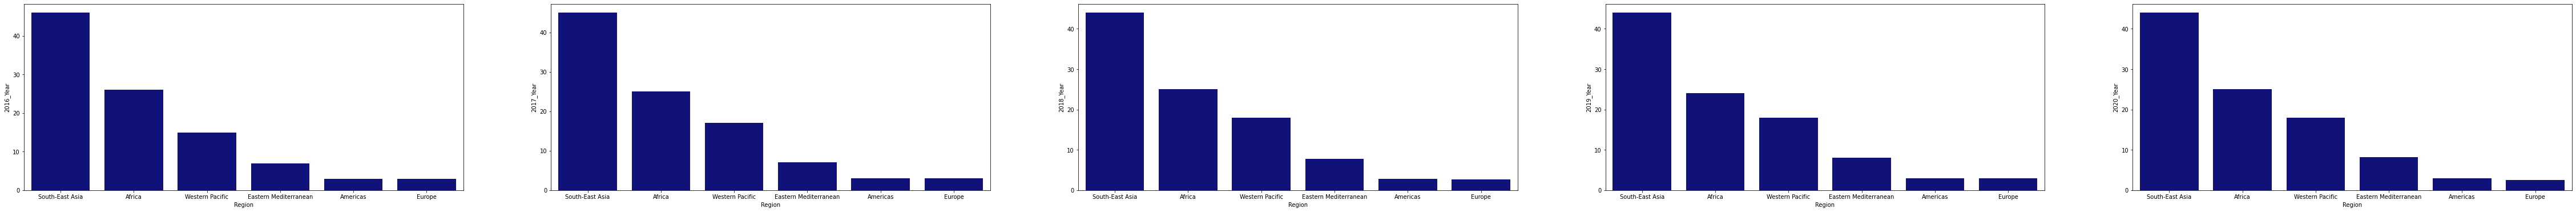

In [106]:
import seaborn as sns
cols = ['2016_Year','2017_Year','2018_Year','2019_Year','2020_Year']
impact_df = global_impact_of_tb[cols]

# Create a figure of a fixed size and axes
f, ax = plt.subplots(1, 5, figsize = (80,6))

# Iterate to draw each scatter plot
for i in range(5):
    plt.sca(ax[i])
    sns.barplot(global_impact_of_tb['Region'],impact_df[cols[i]], color = 'darkblue')
#     plt.xticks(global_impact_of_tb['Region'].name)
    plt.xlabel(global_impact_of_tb['Region'].name)
    plt.ylabel(impact_df[cols[i]].name)

In [108]:
df.loc[df['country'] == 'India'].head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
3010,India,IN,IND,356,2019,inc,num,0-14,a,all,333000,203000.0,464000.0
3011,India,IN,IND,356,2019,inc,num,0-14,f,all,160000,74000.0,246000.0
3012,India,IN,IND,356,2019,inc,num,0-14,m,all,174000,80000.0,267000.0
3013,India,IN,IND,356,2019,inc,num,0-4,f,all,64000,0.0,145000.0
3014,India,IN,IND,356,2019,inc,num,0-4,m,all,78000,0.0,176000.0


In [112]:
south_east_asia_region = pd.DataFrame()
south_east_asia_region = df['country', 'iso2', 'iso3', 'iso_numeric', 'year', 'measure', 'unit', 'age_group', 'sex', 'risk_factor', 'best', 'lo', 'hi'] = 
south_east_asia_region

ValueError: Wrong number of items passed 13, placement implies 1

In [60]:
# countries = df.groupby(['country', 'age_group']).size()
# countries

country                                                   age_group
Afghanistan                                               0-14         3
                                                          0-4          2
                                                          15-24        2
                                                          15plus       6
                                                          18plus       3
                                                                      ..
occupied Palestinian territory, including east Jerusalem  45-54        2
                                                          5-14         2
                                                          55-64        2
                                                          65plus       2
                                                          all          3
Length: 2540, dtype: int64

In [63]:
countries = df.pivot_table(index=["country"], columns = ['age_group'], aggfunc={'country':'count'})
countries

country                    \
age_group                                             0-14  0-4 15-24 15plus   
country                                                                        
Afghanistan                                            3.0  2.0   2.0    6.0   
Albania                                                3.0  2.0   2.0    9.0   
Algeria                                                3.0  2.0   2.0    8.0   
American Samoa                                         3.0  2.0   2.0    3.0   
Andorra                                                3.0  2.0   2.0    9.0   
...                                                    ...  ...   ...    ...   
Wallis and Futuna Islands                              3.0  2.0   2.0    3.0   
Yemen                                                  3.0  2.0   2.0    9.0   
Zambia                                                 3.0  2.0   2.0    9.0   
Zimbabwe                                               3.0  2.0   2.0    9.0   
occupied Palestinian territory, including east ...     3.0  2.0   2.0    3.0   

                                                                             \
age_group                                          18plus 25-34 35-44 45-54   
country                                                                       
Afghanistan                                           3.0   2.0   2.0   2.0   
Albania                                               3.0   2.0   2.0   2.0   
Algeria                                               3.0   2.0   2.0   2.0   
American Samoa                                        NaN   2.0   2.0   2.0   
Andorra                                               3.0   2.0   2.0   2.0   
...                                                   ...   ...   ...   ...   
Wallis and Futuna Islands                             NaN   2.0   2.0   2.0   
Yemen                                                 3.0   2.0   2.0   2.0   
Zambia                                                3.0   2.0   2.0   2.0   
Zimbabwe                                              3.0   2.0   2.0   2.0   
occupied Palestinian territory, including east ...    NaN   2.0   2.0   2.0   

                                                                           
age_group                                          5-14 55-64 65plus  all  
country                                                                    
Afghanistan                                         2.0   2.0    2.0  5.0  
Albania                                             2.0   2.0    2.0  5.0  
Algeria                                             2.0   2.0    2.0  5.0  
American Samoa                                      2.0   2.0    2.0  3.0  
Andorra                                             2.0   2.0    2.0  3.0  
...                                                 ...   ...    ...  ...  
Wallis and Futuna Islands                           2.0   2.0    2.0  3.0  
Yemen                                               2.0   2.0    2.0  5.0  
Zambia                                              2.0   2.0    2.0  5.0  
Zimbabwe                                            2.0   2.0    2.0  5.0  
occupied Palestinian territory, including east ...  2.0   2.0    2.0  3.0  

[214 rows x 12 columns]

In [64]:
countries.isnull().values.any()

True

In [65]:
dropped_countries = countries.dropna(axis = 0)
dropped_countries

country                                 \
age_group                             0-14  0-4 15-24 15plus 18plus 25-34   
country                                                                     
Afghanistan                            3.0  2.0   2.0    6.0    3.0   2.0   
Albania                                3.0  2.0   2.0    9.0    3.0   2.0   
Algeria                                3.0  2.0   2.0    8.0    3.0   2.0   
Andorra                                3.0  2.0   2.0    9.0    3.0   2.0   
Angola                                 3.0  2.0   2.0    6.0    3.0   2.0   
...                                    ...  ...   ...    ...    ...   ...   
Venezuela (Bolivarian Republic of)     3.0  2.0   2.0    6.0    3.0   2.0   
Viet Nam                               3.0  2.0   2.0    6.0    3.0   2.0   
Yemen                                  3.0  2.0   2.0    9.0    3.0   2.0   
Zambia                                 3.0  2.0   2.0    9.0    3.0   2.0   
Zimbabwe                               3.0  2.0   2.0    9.0    3.0   2.0   

                                                                       
age_group                          35-44 45-54 5-14 55-64 65plus  all  
country                                                                
Afghanistan                          2.0   2.0  2.0   2.0    2.0  5.0  
Albania                              2.0   2.0  2.0   2.0    2.0  5.0  
Algeria                              2.0   2.0  2.0   2.0    2.0  5.0  
Andorra                              2.0   2.0  2.0   2.0    2.0  3.0  
Angola                               2.0   2.0  2.0   2.0    2.0  5.0  
...                                  ...   ...  ...   ...    ...  ...  
Venezuela (Bolivarian Republic of)   2.0   2.0  2.0   2.0    2.0  5.0  
Viet Nam                             2.0   2.0  2.0   2.0    2.0  5.0  
Yemen                                2.0   2.0  2.0   2.0    2.0  5.0  
Zambia                               2.0   2.0  2.0   2.0    2.0  5.0  
Zimbabwe                             2.0   2.0  2.0   2.0    2.0  5.0  

[186 rows x 12 columns]

In [66]:
dropped_countries['Total'] = dropped_countries.sum(axis=1)
dropped_countries

<ipython-input-66-37b4488f4bf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_countries['Total'] = dropped_countries.sum(axis=1)


country                                 \
age_group                             0-14  0-4 15-24 15plus 18plus 25-34   
country                                                                     
Afghanistan                            3.0  2.0   2.0    6.0    3.0   2.0   
Albania                                3.0  2.0   2.0    9.0    3.0   2.0   
Algeria                                3.0  2.0   2.0    8.0    3.0   2.0   
Andorra                                3.0  2.0   2.0    9.0    3.0   2.0   
Angola                                 3.0  2.0   2.0    6.0    3.0   2.0   
...                                    ...  ...   ...    ...    ...   ...   
Venezuela (Bolivarian Republic of)     3.0  2.0   2.0    6.0    3.0   2.0   
Viet Nam                               3.0  2.0   2.0    6.0    3.0   2.0   
Yemen                                  3.0  2.0   2.0    9.0    3.0   2.0   
Zambia                                 3.0  2.0   2.0    9.0    3.0   2.0   
Zimbabwe                               3.0  2.0   2.0    9.0    3.0   2.0   

                                                                      Total  
age_group                          35-44 45-54 5-14 55-64 65plus  all        
country                                                                      
Afghanistan                          2.0   2.0  2.0   2.0    2.0  5.0  33.0  
Albania                              2.0   2.0  2.0   2.0    2.0  5.0  36.0  
Algeria                              2.0   2.0  2.0   2.0    2.0  5.0  35.0  
Andorra                              2.0   2.0  2.0   2.0    2.0  3.0  34.0  
Angola                               2.0   2.0  2.0   2.0    2.0  5.0  33.0  
...                                  ...   ...  ...   ...    ...  ...   ...  
Venezuela (Bolivarian Republic of)   2.0   2.0  2.0   2.0    2.0  5.0  33.0  
Viet Nam                             2.0   2.0  2.0   2.0    2.0  5.0  33.0  
Yemen                                2.0   2.0  2.0   2.0    2.0  5.0  36.0  
Zambia                               2.0   2.0  2.0   2.0    2.0  5.0  36.0  
Zimbabwe                             2.0   2.0  2.0   2.0    2.0  5.0  36.0  

[186 rows x 13 columns]

In [58]:
maximum_effected_countries = dropped_countries.loc[dropped_countries['Total'] == dropped_countries['Total'].max()]
maximum_effected_countries

country                                                        \
age_group     0-14  0-4 15-24 15plus 18plus 25-34 35-44 45-54 5-14 55-64   
country                                                                    
Albania        3.0  2.0   2.0    9.0    3.0   2.0   2.0   2.0  2.0   2.0   
Argentina      3.0  2.0   2.0    9.0    3.0   2.0   2.0   2.0  2.0   2.0   
Armenia        3.0  2.0   2.0    9.0    3.0   2.0   2.0   2.0  2.0   2.0   
Australia      3.0  2.0   2.0    9.0    3.0   2.0   2.0   2.0  2.0   2.0   
Austria        3.0  2.0   2.0    9.0    3.0   2.0   2.0   2.0  2.0   2.0   
...            ...  ...   ...    ...    ...   ...   ...   ...  ...   ...   
Uruguay        3.0  2.0   2.0    9.0    3.0   2.0   2.0   2.0  2.0   2.0   
Uzbekistan     3.0  2.0   2.0    9.0    3.0   2.0   2.0   2.0  2.0   2.0   
Yemen          3.0  2.0   2.0    9.0    3.0   2.0   2.0   2.0  2.0   2.0   
Zambia         3.0  2.0   2.0    9.0    3.0   2.0   2.0   2.0  2.0   2.0   
Zimbabwe       3.0  2.0   2.0    9.0    3.0   2.0   2.0   2.0  2.0   2.0   

                       Total  
age_group  65plus  all        
country                       
Albania       2.0  5.0  36.0  
Argentina     2.0  5.0  36.0  
Armenia       2.0  5.0  36.0  
Australia     2.0  5.0  36.0  
Austria       2.0  5.0  36.0  
...           ...  ...   ...  
Uruguay       2.0  5.0  36.0  
Uzbekistan    2.0  5.0  36.0  
Yemen         2.0  5.0  36.0  
Zambia        2.0  5.0  36.0  
Zimbabwe      2.0  5.0  36.0  

[119 rows x 13 columns]

In [59]:
plt.figure(figsize = (12,6))
plt.bar(maximum_effected_countries['country'],maximum_effected_countries['age_group'])
plt.xticks(maximum_effected_countries['country'],maximum_effected_countries['age_group'])
plt.xlabel('Age Groups')
plt.ylabel('Countries')
plt.show()

KeyError: 'age_group'

<Figure size 864x432 with 0 Axes>

In [15]:
maximum_effected_countries = maximum_effected_countries.loc[maximum_effected_countries['15plus'] == 9.0]
maximum_effected_countries
"""Age group of 15plus are the more effected people from TB"""

'Age group of 15plus are the more effected people from TB'

In [17]:
age_group_fifteen_plus = df.loc[df['age_group'] == '15plus']
age_group_fifteen_plus

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
7,Afghanistan,AF,AFG,4,2019,inc,num,15plus,a,all,57000,30000.0,84000.0
8,Afghanistan,AF,AFG,4,2019,inc,num,15plus,a,alc,520,58.0,1500.0
9,Afghanistan,AF,AFG,4,2019,inc,num,15plus,f,alc,73,4.0,240.0
10,Afghanistan,AF,AFG,4,2019,inc,num,15plus,f,all,32000,10000.0,53000.0
11,Afghanistan,AF,AFG,4,2019,inc,num,15plus,m,all,25000,8300.0,42000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,Zimbabwe,ZW,ZWE,716,2019,inc,num,15plus,f,smk,76,1.0,300.0
7191,Zimbabwe,ZW,ZWE,716,2019,inc,num,15plus,f,all,10000,6000.0,15000.0
7192,Zimbabwe,ZW,ZWE,716,2019,inc,num,15plus,m,all,16000,9300.0,23000.0
7193,Zimbabwe,ZW,ZWE,716,2019,inc,num,15plus,m,alc,3200,540.0,8300.0


In [42]:
fifteen_plus_grouped = age_group_fifteen_plus.pivot_table(index=["country"], columns = ['age_group', 'sex', 'risk_factor'], aggfunc={'sex':'count'})
fifteen_plus_grouped

sex                      \
age_group                                          15plus                       
sex                                                     a              f        
risk_factor                                           alc  all  smk  alc  all   
country                                                                         
Afghanistan                                           1.0  1.0  NaN  1.0  1.0   
Albania                                               1.0  1.0  1.0  1.0  1.0   
Algeria                                               1.0  1.0  1.0  NaN  1.0   
American Samoa                                        NaN  1.0  NaN  NaN  1.0   
Andorra                                               1.0  1.0  1.0  1.0  1.0   
...                                                   ...  ...  ...  ...  ...   
Wallis and Futuna Islands                             NaN  1.0  NaN  NaN  1.0   
Yemen                                                 1.0  1.0  1.0  1.0  1.0   
Zambia                                                1.0  1.0  1.0  1.0  1.0   
Zimbabwe                                              1.0  1.0  1.0  1.0  1.0   
occupied Palestinian territory, including east ...    NaN  1.0  NaN  NaN  1.0   

                                                                        
age_group                                                               
sex                                                        m            
risk_factor                                         smk  alc  all  smk  
country                                                                 
Afghanistan                                         NaN  1.0  1.0  NaN  
Albania                                             1.0  1.0  1.0  1.0  
Algeria                                             1.0  1.0  1.0  1.0  
American Samoa                                      NaN  NaN  1.0  NaN  
Andorra                                             1.0  1.0  1.0  1.0  
...                                                 ...  ...  ...  ...  
Wallis and Futuna Islands                           NaN  NaN  1.0  NaN  
Yemen                                               1.0  1.0  1.0  1.0  
Zambia                                              1.0  1.0  1.0  1.0  
Zimbabwe                                            1.0  1.0  1.0  1.0  
occupied Palestinian territory, including east ...  NaN  NaN  1.0  NaN  

[214 rows x 9 columns]

In [43]:
fifteen_plus_grouped.isnull().values.any()

True

In [44]:
fifteen_plus_grouped.dropna(inplace=True)
fifteen_plus_grouped

sex                                        
age_group   15plus                                        
sex              a              f              m          
risk_factor    alc  all  smk  alc  all  smk  alc  all  smk
country                                                   
Albania        1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
Andorra        1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
Argentina      1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
Armenia        1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
Australia      1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
...            ...  ...  ...  ...  ...  ...  ...  ...  ...
Uzbekistan     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
Vanuatu        1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
Yemen          1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
Zambia         1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
Zimbabwe       1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

[139 rows x 9 columns]

In [45]:
merged = pd.merge(fifteen_plus_grouped, maximum_effected_countries , left_on='country', right_on='country', how='inner')
merged

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (4 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,"(sex, 15plus, a, alc)","(sex, 15plus, a, all)","(sex, 15plus, a, smk)","(sex, 15plus, f, alc)","(sex, 15plus, f, all)","(sex, 15plus, f, smk)","(sex, 15plus, m, alc)","(sex, 15plus, m, all)","(sex, 15plus, m, smk)",0-14,...,15-24,15plus,18plus,25-34,35-44,45-54,5-14,55-64,65plus,all
country,,,,,,,,,,,,,,,,,,,,,
Albania,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,...,2.0,9.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0
Argentina,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,...,2.0,9.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0
Armenia,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,...,2.0,9.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0
Australia,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,...,2.0,9.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0
Austria,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,...,2.0,9.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,...,2.0,9.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0
Uzbekistan,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,...,2.0,9.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0
Yemen,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,...,2.0,9.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0
